In [2]:
import matplotlib.pyplot as plt
import json

In [3]:
with open('data.json', 'r') as f:
    data = json.load(f)

# Execution time comparison

In [4]:
global_time_parallel = [entry["Time (s)"] for entry in data["parallel"]]
hotspot_time_parallel = [entry["Hotspot"]
                         ["Time (s)"] for entry in data["parallel"]]
global_time_mpi = [entry["Time (s)"] for entry in data["mpi"]]

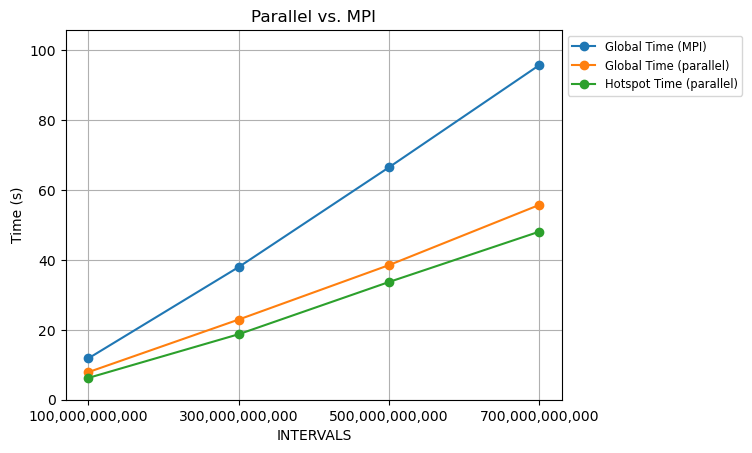

In [5]:
plt.figure()
plt.plot([f"{entry['INTERVALS']:,}" for entry in data["parallel"]],
         global_time_mpi, label="Global Time (MPI)", marker='o')
plt.plot([f"{entry['INTERVALS']:,}" for entry in data["parallel"]],
         global_time_parallel, label="Global Time (parallel)", marker='o')
plt.plot([f"{entry['INTERVALS']:,}" for entry in data["parallel"]],
         hotspot_time_parallel, label="Hotspot Time (parallel)", marker='o')
plt.xlabel("INTERVALS")
plt.ylabel("Time (s)")
plt.ylim(0, max(global_time_mpi + global_time_parallel) + 10)
plt.legend(loc="upper left", fontsize='small',
           title_fontsize='medium', bbox_to_anchor=(1, 1))
plt.title("Parallel vs. MPI")
plt.grid(True)
plt.show()

# Speedup & efficiency

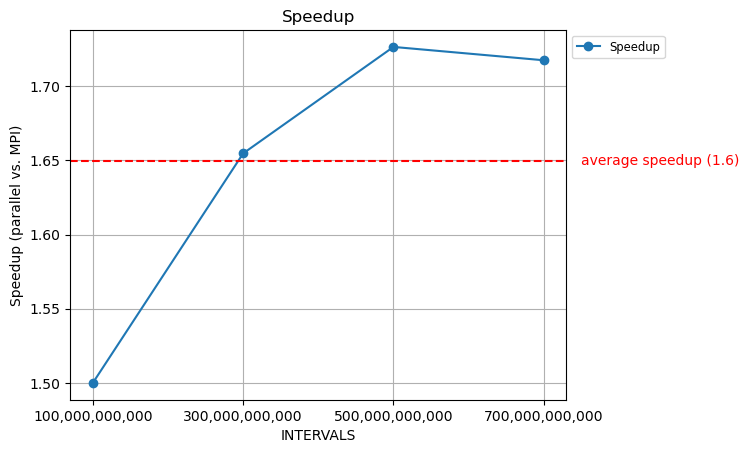

In [6]:
speedup = [global_time_mpi[i] / global_time_parallel[i]
           for i in range(len(global_time_mpi))]
average_speedup = sum(speedup) / len(speedup)

plt.figure()
plt.plot([f"{entry['INTERVALS']:,}" for entry in data["parallel"]],
         speedup, label="Speedup", marker='o')
plt.axhline(y=average_speedup, color='r', linestyle='--')
plt.text(len(data["parallel"]) - 0.75, average_speedup, f'average speedup ({average_speedup:.2})',
         color='r', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', pad=0))
plt.xlabel("INTERVALS")
plt.ylabel("Speedup (parallel vs. MPI)")
plt.legend(loc="upper left", fontsize='small',
           title_fontsize='medium', bbox_to_anchor=(1, 1))
plt.title("Speedup")
plt.grid(True)
plt.show()